   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        moderate        54.8  
2       

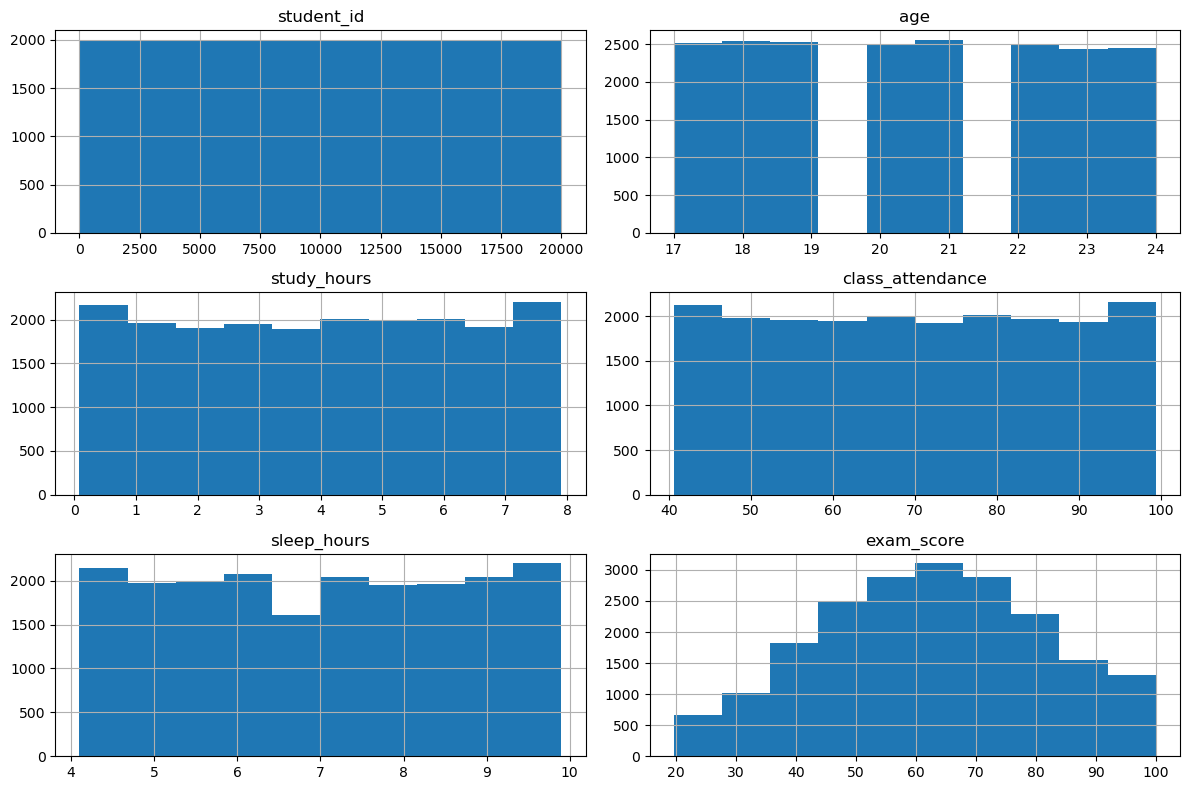


Value counts for gender
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Value counts for course
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Value counts for internet_access
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Value counts for sleep_quality
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Value counts for study_method
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Value counts for facility_rating
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

Value counts for exam_difficulty
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


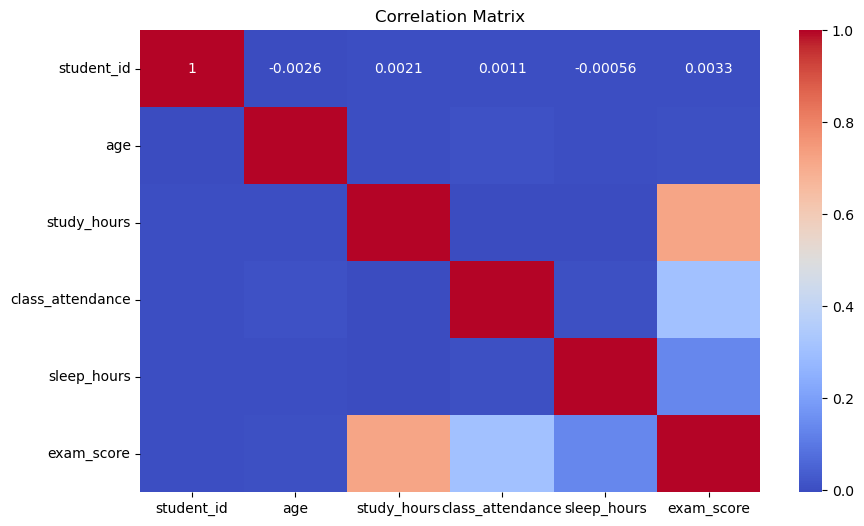

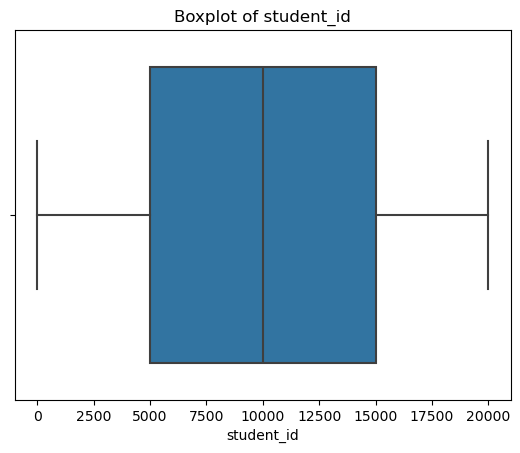

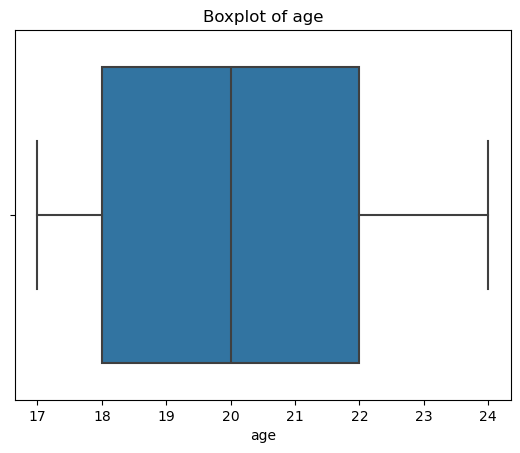

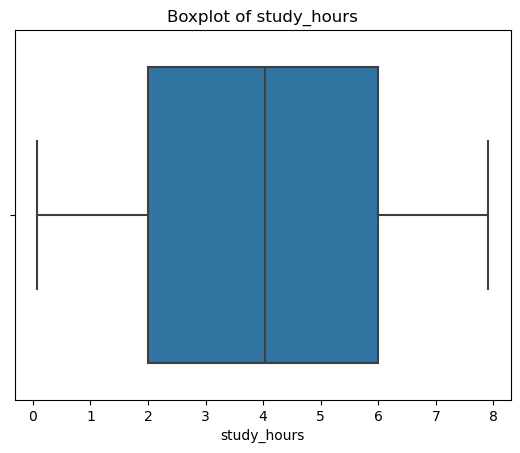

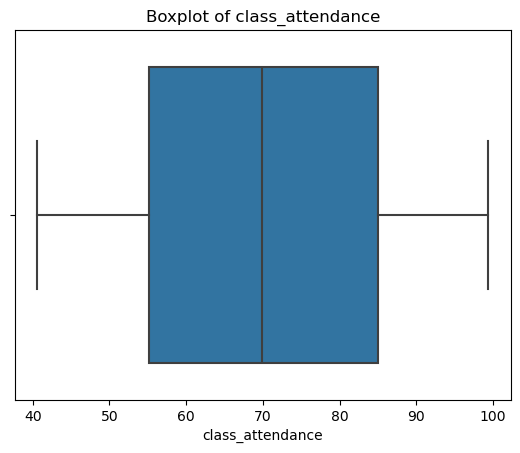

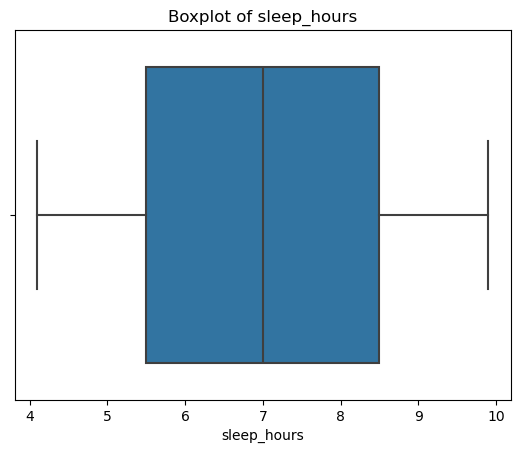

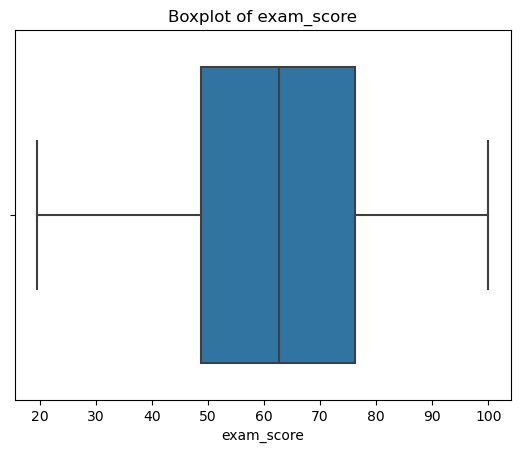

In [1]:
# =========================
# EDA on Exam_Score_Prediction.csv
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Exam_Score_Prediction.csv")

# Basic overview
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
print(df.describe())

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# -------------------------
# Univariate Analysis
# -------------------------
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# -------------------------
# Categorical feature analysis
# -------------------------
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    print(f"\nValue counts for {col}")
    print(df[col].value_counts())

# -------------------------
# Correlation Matrix
# -------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# -------------------------
# Target vs Features (if target = Exam_Score)
# -------------------------
if "Exam_Score" in df.columns:
    num_cols = df.select_dtypes(include=np.number).columns.drop("Exam_Score")

    for col in num_cols:
        plt.figure()
        sns.scatterplot(x=df[col], y=df["Exam_Score"])
        plt.title(f"{col} vs Exam_Score")
        plt.show()

# -------------------------
# Outlier detection (Boxplots)
# -------------------------
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
